In [162]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.utils as ku
import tensorflow as tf
import numpy as np
import re

In [119]:
tokenizer = Tokenizer()

data = open('fellowship-small.txt').read()

data = data.replace(',', ' pausesentence')
data = data.replace('!', ' exclamationmark')
data = data.replace('?', '.')

corpus = data.lower().split(". ")

for i in range(len(corpus)):
    corpus [i] =  corpus [i] + 'endofthesentence'

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [135]:
len(corpus)#tokenizer.word_counts

319

In [127]:
model = Sequential()

model.add(Embedding(1774, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(40, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 80, 64)            113536    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 80, 40)            13600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80, 40)            0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 40)                9760      
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_15 (Dense)             (None, 1774)              72734     
Total params: 211,270
Trainable params: 211,270
Non-trainable params: 0
_________________________________________________________________
None

In [100]:
history = model.fit(predictors, label, epochs=100, verbose=1)

/Users/me/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
92307/92307 [==============================] - 432s 5ms/step - loss: 6.3896 - acc: 0.0676
Epoch 2/100
 8128/92307 [=>............................] - ETA: 8:45 - loss: 5.9992 - acc: 0.0897

KeyboardInterrupt: 

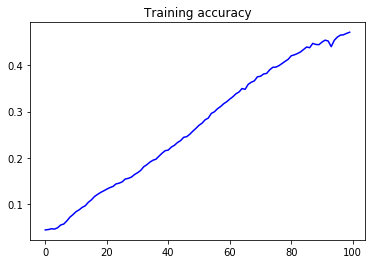

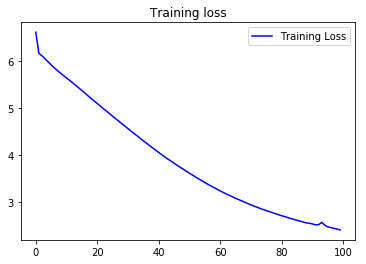

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [131]:
model.load_weights("model_with_marks_as_words.h5")

In [164]:
seed_text = "It will have to be paid for"
next_words = 500
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            if output_word == 'endofthesentence':
                output_word = '.'
            break
    seed_text += " " + output_word
    
seed_text = seed_text.replace('endofthesentence', '.')
seed_text = seed_text.replace(' pausesentence', ',')
seed_text = seed_text.replace(' exclamationmark', '!')

rtn = re.split('([.!?] *)', seed_text)
seed_text = ''.join([each.capitalize() for each in rtn])

count_sentences = 0
for i in range(len(seed_text)):
    if seed_text[i] == '.':
        count_sentences += 1
        if count_sentences%5 == 0:  
            seed_text = seed_text[:i] + '.\n\n' + seed_text[i+1:].strip()

print(seed_text)

It will have to be paid for everyone guessed. Offer a queer place, and nasturtiums since his remarkable disappearance and boffins, and also detested the pavilion, the upturned faces. All his table and brandybucks, and grubbs, and chubbs, and burrowses, and hornblowers, and bolgers, bracegirdles, goodbodies, brockhouses and proudfoots.,, goodbodies, brockhouses and proudfoots. The joke was food and drink were needed to cure the guests of shock and annoyance.

Was asked that was generally for. The very bagginses, and let drink for. The old man was nowhere to be been seen by the guests were selected in the hobbits might say by one. Since the hobbits woke to find the gaffer, and very gorbadoc conjuror, bracegirdles, games, and was began to talk, brockhouses and drink. The old bad miller childhood and generally generally for.

The top of your betters, and asked tunnels., games, and was generally postmen were not green. Liked that was not considered more ‘and more about that lives and annoya